# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [65]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [66]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [67]:
# Create lists for weather checks data
lon =  []
lat = []
country = []
city_name = []
cloudiness = []
humidity = []
date = []
max_temp = []
wind_speed = []
count = 0

print(f'Beginning Data Retrieval...')

for city in cities:
    try:
        response = requests.get(f'{query_url}{city}').json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        count +=1 
        print(f'Processing Data Record... {count} | {city}')
        
    except KeyError:
        print(f'City not found. Next City Processing...')
   

Beginning Data Retrieval...
Processing Data Record... 1 | hauterive
Processing Data Record... 2 | beidao
Processing Data Record... 3 | albany
Processing Data Record... 4 | namibe
Processing Data Record... 5 | baykit
Processing Data Record... 6 | qaanaaq
Processing Data Record... 7 | rikitea
Processing Data Record... 8 | viedma
Processing Data Record... 9 | esperance
Processing Data Record... 10 | bredasdorp
Processing Data Record... 11 | vanimo
Processing Data Record... 12 | conde
Processing Data Record... 13 | yulara
Processing Data Record... 14 | sakaiminato
Processing Data Record... 15 | naze
Processing Data Record... 16 | sabya
Processing Data Record... 17 | port alfred
Processing Data Record... 18 | san jose
Processing Data Record... 19 | vaini
City not found. Next City Processing...
Processing Data Record... 20 | korla
Processing Data Record... 21 | nabire
Processing Data Record... 22 | adwa
Processing Data Record... 23 | yuryev-polskiy
Processing Data Record... 24 | busselton
Pr

Processing Data Record... 193 | pella
City not found. Next City Processing...
Processing Data Record... 194 | belmonte
Processing Data Record... 195 | burnie
City not found. Next City Processing...
Processing Data Record... 196 | monrovia
Processing Data Record... 197 | nioro
Processing Data Record... 198 | lagoa
Processing Data Record... 199 | anadyr
Processing Data Record... 200 | san cristobal
Processing Data Record... 201 | husavik
Processing Data Record... 202 | bang rakam
Processing Data Record... 203 | codrington
Processing Data Record... 204 | huangzhou
Processing Data Record... 205 | ulladulla
Processing Data Record... 206 | vardo
Processing Data Record... 207 | iqaluit
Processing Data Record... 208 | ayagoz
Processing Data Record... 209 | klaksvik
Processing Data Record... 210 | bengkulu
Processing Data Record... 211 | tambura
Processing Data Record... 212 | luena
Processing Data Record... 213 | karpathos
Processing Data Record... 214 | dingle
City not found. Next City Proces

Processing Data Record... 378 | uyuni
Processing Data Record... 379 | alice springs
Processing Data Record... 380 | zapolyarnyy
Processing Data Record... 381 | maridi
Processing Data Record... 382 | half moon bay
Processing Data Record... 383 | sault sainte marie
Processing Data Record... 384 | narsaq
Processing Data Record... 385 | denpasar
Processing Data Record... 386 | moree
Processing Data Record... 387 | nanortalik
Processing Data Record... 388 | krutikha
Processing Data Record... 389 | praia da vitoria
Processing Data Record... 390 | aklavik
Processing Data Record... 391 | jalapa
City not found. Next City Processing...
Processing Data Record... 392 | victoria point
City not found. Next City Processing...
Processing Data Record... 393 | sao jose da coroa grande
Processing Data Record... 394 | san patricio
City not found. Next City Processing...
Processing Data Record... 395 | ariguani
Processing Data Record... 396 | hanzhong
Processing Data Record... 397 | hualmay
Processing Data

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [68]:
# create a data frame from cities weather

weather_dict = {
    "Lat":lat,
    "Lng":lon,
    "Country":country,
    "City":city_name,
    "Cloudiness":cloudiness,
    "Date":date,
    "Humidity":humidity,
    "Max Temp":max_temp,
    "Wind Speed":wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,Lat,Lng,Country,City,Cloudiness,Date,Humidity,Max Temp,Wind Speed
0,46.0901,3.4459,FR,Hauterive,6,1659550692,26,93.96,1.61
1,34.5686,105.8933,CN,Beidao,11,1659550692,88,70.75,3.89
2,42.6001,-73.9662,US,Albany,5,1659550574,44,88.65,2.42
3,-15.1961,12.1522,AO,Mossamedes,33,1659550693,79,61.09,5.70
4,61.6700,96.3700,RU,Baykit,100,1659550694,95,50.36,3.56


In [69]:
#Export city data into a .csv 
weather_data.to_csv("weather_results.csv")

In [70]:
weather_data.head()

,Lat,Lng,Country,City,Cloudiness,Date,Humidity,Max Temp,Wind Speed
0,46.0901,3.4459,FR,Hauterive,6,1659550692,26,93.96,1.61
1,34.5686,105.8933,CN,Beidao,11,1659550692,88,70.75,3.89
2,42.6001,-73.9662,US,Albany,5,1659550574,44,88.65,2.42
3,-15.1961,12.1522,AO,Mossamedes,33,1659550693,79,61.09,5.70
4,61.6700,96.3700,RU,Baykit,100,1659550694,95,50.36,3.56


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [71]:
#Find the Stats for all data involving Humidity to find the max amount to see if it is greater than 100
Humidity_stats = weather_data["Humidity"].describe(include ="all")
Humidity_stats


count    551.000000
mean      70.564428
std       21.550679
min        1.000000
25%       58.500000
50%       76.000000
75%       88.000000
max      100.000000
Name: Humidity, dtype: float64

In [72]:
print("There are no humidities above 100 looking at our statistics, can skip this step.")

There are no humidities above 100 looking at our statistics, can skip this step.


In [73]:
#  Get the indices of cities that have humidity over 100%.


In [74]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

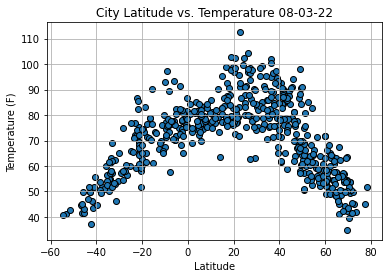

In [80]:
EndDate = weather_data["Date"].max()
CurrentDate = datetime.utcfromtimestamp(EndDate).strftime('%m-%d-%y')
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Temperature {CurrentDate}")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

In [13]:
print("The Temperature is higher in cities that are closer to 0 latitude. The temperatures above 100 are between 20 to 40 latitude.")

The Temperature is higher in cities that are closer to 0 latitude. The temperatures above 100 are between 20 to 40 latitude.


## Latitude vs. Humidity Plot

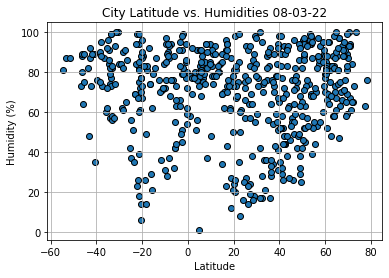

In [81]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidities {CurrentDate}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumiditiesInWorldCities.png")

# Show plot
plt.show()

In [82]:
print("It appears that from -40 to 60 latitude, humidity is 60%- 100% for the majority of the area represented in this graph.")

It appears that from -40 to 60 latitude, humidity is 60%- 100% for the majority of the area represented in this graph.


## Latitude vs. Cloudiness Plot

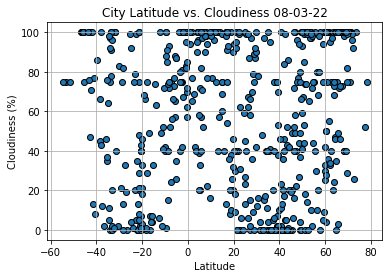

In [83]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness {CurrentDate}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

In [84]:
print("The cloudiness is not very specfic, a lot of variation but the further you go away from 0 on the x- axis the less frequent clouds there is on the graph.")

The cloudiness is not very specfic, a lot of variation but the further you go away from 0 on the x- axis the less frequent clouds there is on the graph.


## Latitude vs. Wind Speed Plot

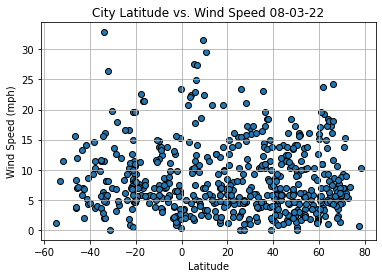

In [85]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed {CurrentDate}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

In [86]:
print("From the graph above, wind speeds do not usually go above 20 mph for any latitude range. Majority of the wind speeds are congested between 0 to 10 mph.")

From the graph above, wind speeds do not usually go above 20 mph for any latitude range. Majority of the wind speeds are congested between 0 to 10 mph.


## Linear Regression

In [87]:
#Def function
north = weather_data.loc[weather_data["Lat"] >= 0.0]
north.reset_index(inplace=True)
south = weather_data.loc[weather_data["Lat"] < 0.0]
south.reset_index(inplace=True)

In [88]:
#Using def plot gives us a generic setup for plots to reference
#add necessary plot values and labels 
def plotLinearRegression(xVal,yVal,plotTitle,xLabel,yLabel,labelPos,plotFig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xVal, yVal)
    #printing the r value for each scatter plot
    print(f"The r value is: {rvalue}")
    regressVal = xVal * slope + intercept
    lineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xVal,yVal,marker="o", facecolors="blue", edgecolors="black")
    plt.plot(xVal,regressVal,"r-")
    plt.annotate(lineEquation,labelPos,fontsize=15,color="red")
    plt.title(plotTitle)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.6792524003699999


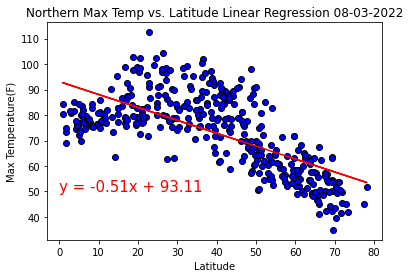

<Figure size 432x288 with 0 Axes>

In [89]:
plotTitle = "Northern Max Temp vs. Latitude Linear Regression 08-03-2022"
xLabel = "Latitude"
yLabel = "Max Temperature(F)"
labelPos = (0, 50)
plotLinearRegression(north["Lat"], north["Max Temp"],plotTitle, xLabel, yLabel, labelPos, 1)
# Save the figure
plt.savefig("NorthMaxTempRegression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.8296549374753539


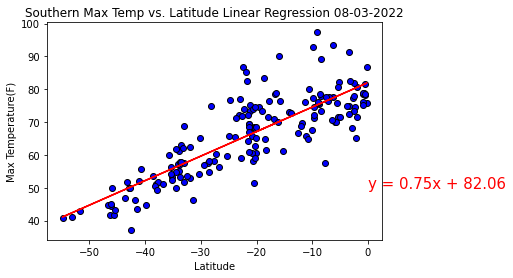

<Figure size 432x288 with 0 Axes>

In [90]:
plotTitle = "Southern Max Temp vs. Latitude Linear Regression 08-03-2022"
xLabel = "Latitude"
yLabel = "Max Temperature(F)"
labelPos = (0, 50)
plotLinearRegression(south["Lat"], south["Max Temp"],plotTitle, xLabel, yLabel, labelPos, 1)
# Save the figure
plt.savefig("SouthMaxTempRegression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.10806708231127558


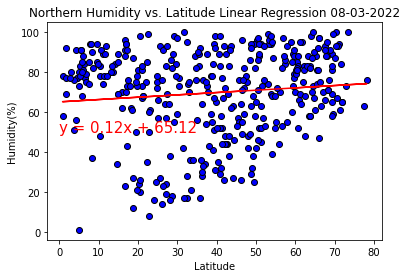

<Figure size 432x288 with 0 Axes>

In [91]:
plotTitle = "Northern Humidity vs. Latitude Linear Regression 08-03-2022"
xLabel = "Latitude"
yLabel = "Humidity(%)"
labelPos = (0, 50)
plotLinearRegression(north["Lat"], north["Humidity"],plotTitle, xLabel, yLabel, labelPos, 1)
# Save the figure
plt.savefig("NorthHumidityLatRegression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: -0.14070735841072482


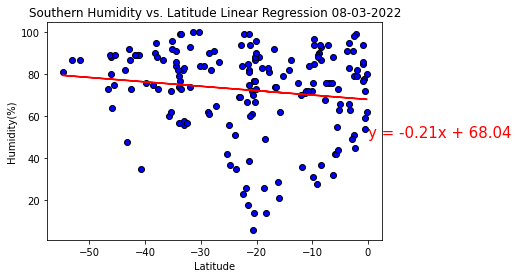

<Figure size 432x288 with 0 Axes>

In [92]:
plotTitle = "Southern Humidity vs. Latitude Linear Regression 08-03-2022"
xLabel = "Latitude"
yLabel = "Humidity(%)"
labelPos = (0, 50)
plotLinearRegression(south["Lat"], south["Humidity"],plotTitle, xLabel, yLabel, labelPos, 1)
# Save the figure
plt.savefig("SouthernHumidityRegression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.02728010095240631


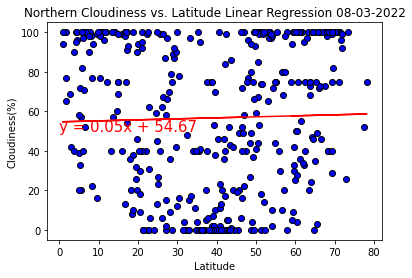

<Figure size 432x288 with 0 Axes>

In [93]:
plotTitle = "Northern Cloudiness vs. Latitude Linear Regression 08-03-2022"
xLabel = "Latitude"
yLabel = "Cloudiness(%)"
labelPos = (0, 50)
plotLinearRegression(north["Lat"], north["Cloudiness"],plotTitle, xLabel, yLabel, labelPos, 1)
# Save the figure
plt.savefig("NorthernCloudsRegression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.035417730816407804


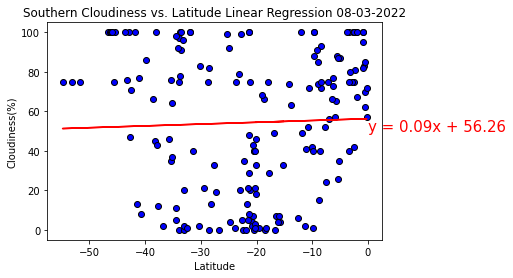

<Figure size 432x288 with 0 Axes>

In [94]:
plotTitle = "Southern Cloudiness vs. Latitude Linear Regression 08-03-2022"
xLabel = "Latitude"
yLabel = "Cloudiness(%)"
labelPos = (0, 50)
plotLinearRegression(south["Lat"], south["Cloudiness"],plotTitle, xLabel, yLabel, labelPos, 1)
# Save the figure
plt.savefig("SouthernCloudsRegression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.11372920939036839


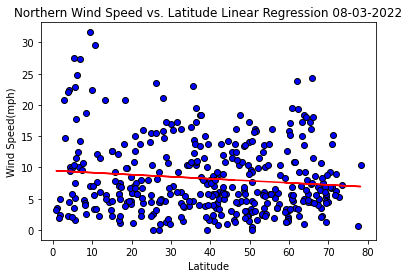

<Figure size 432x288 with 0 Axes>

In [95]:
plotTitle = "Northern Wind Speed vs. Latitude Linear Regression 08-03-2022"
xLabel = "Latitude"
yLabel = "Wind Speed(mph)"
labelPos = (0, 50)
plotLinearRegression(north["Lat"], north["Wind Speed"],plotTitle, xLabel, yLabel, labelPos, 1)
# Save the figure
plt.savefig("NorthernWindSpeedRegression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.0655145847495339


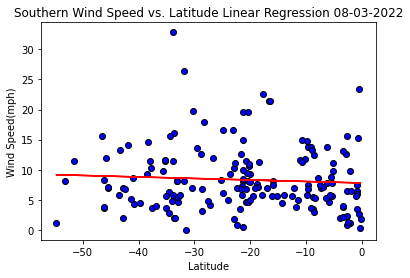

<Figure size 432x288 with 0 Axes>

In [96]:
plotTitle = "Southern Wind Speed vs. Latitude Linear Regression 08-03-2022"
xLabel = "Latitude"
yLabel = "Wind Speed(mph)"
labelPos = (0, 50)
plotLinearRegression(south["Lat"], south["Wind Speed"],plotTitle, xLabel, yLabel, labelPos, 1)
# Save the figure
plt.savefig("SouthernWindSpeedRegression.png")